In [1]:
import pysplit
import pandas as pd
import numpy as np
from wrf import getvar, get_basemap, latlon_coords
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import matplotlib as mpl
import xarray as xr
from itertools import product
import matplotlib.patheffects as path_effects

In [2]:
def get_winddir(comp_brngs):
    md = 270 - comp_brngs
    if md < 0:
        new_md = md + 360
    else:
        new_md = md
    return new_md 

def nan_if(arr, value):
    return np.where(arr == value, np.nan, arr)

wrffile = Dataset('/glade/scratch/molina/basile/wrfout_d01_2002-12-30_18:00:00.nc4')
tfile = getvar(wrffile, 'tk')
m = get_basemap(tfile)
lats, lons = latlon_coords(tfile)

In [3]:
cmap = sns.cubehelix_palette(16, start=.5, rot=-.75, as_cmap=True)
norm = mpl.colors.Normalize(vmin=0,vmax=20)

In [4]:
which_climate='hist'
ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc")
x, y = np.meshgrid(ds1.lons.values, ds1.lats.values)

In [5]:
maskfile = xr.open_dataset('/glade/scratch/molina/basile/maskfile.nc')

In [6]:
land=np.ma.masked_where(maskfile.land.values==1, maskfile.land.values)
goa=np.ma.masked_where(maskfile.goa.values==1, maskfile.goa.values)
bs=np.ma.masked_where(maskfile.bs.values==1, maskfile.bs.values)
ao=np.ma.masked_where(maskfile.ao.values==1, maskfile.ao.values)
none=np.ma.masked_where(maskfile.none.values==1, maskfile.none.values)

In [7]:
def regions_to_str(number):
    
    m = {
         1: 'West Coast',
         3: 'Central Interior',
         4: 'North Slope',
         5: 'Northeast Interior',
         6: 'Southeast Interior'
        }

    try:
        out = m[number]
        return out
    
    except:
        raise ValueError('Not a region')

In [8]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").frequency
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").frequency
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").frequency
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").frequency
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").frequency

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").frequency
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").frequency
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").frequency
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").frequency
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").frequency

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").frequency
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").frequency
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").frequency
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").frequency
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").frequency

ds16=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion1_{which_climate}.nc").frequency
ds17=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion3_{which_climate}.nc").frequency
ds18=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion4_{which_climate}.nc").frequency
ds19=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion5_{which_climate}.nc").frequency
ds20=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion6_{which_climate}.nc").frequency

reg1=ds1+ds6+ds11+ds16
reg3=ds2+ds7+ds12+ds17
reg4=ds3+ds8+ds13+ds18
reg5=ds4+ds9+ds14+ds19
reg6=ds5+ds10+ds15+ds20

In [9]:
x, y = reg1.lons.values, reg1.lats.values

freq_1c=np.ma.masked_where(reg1==0, 100*(reg1/reg1.sum()))
freq_1c_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, reg1))/reg1.values.sum()*100, 1))
freq_1c_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg1))/reg1.values.sum()*100, 1))
freq_1c_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg1))/reg1.values.sum()*100, 1))
freq_1c_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg1))/reg1.values.sum()*100, 1))

freq_3c=np.ma.masked_where(reg3==0, 100*(reg3/reg3.sum()))
freq_3c_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, reg3))/reg3.values.sum()*100, 1))
freq_3c_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg3))/reg3.values.sum()*100, 1))
freq_3c_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg3))/reg3.values.sum()*100, 1))
freq_3c_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg3))/reg3.values.sum()*100, 1))

freq_4c=np.ma.masked_where(reg4==0, 100*(reg4/reg4.sum()))
freq_4c_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, reg4))/reg4.values.sum()*100, 1))
freq_4c_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg4))/reg4.values.sum()*100, 1))
freq_4c_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg4))/reg4.values.sum()*100, 1))
freq_4c_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg4))/reg4.values.sum()*100, 1))

freq_5c=np.ma.masked_where(reg5==0, 100*(reg5/reg5.sum()))
freq_5c_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, reg5))/reg5.values.sum()*100, 1))
freq_5c_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg5))/reg5.values.sum()*100, 1))
freq_5c_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg5))/reg5.values.sum()*100, 1))
freq_5c_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg5))/reg5.values.sum()*100, 1))

freq_6c=np.ma.masked_where(reg6==0, 100*(reg6/reg6.sum()))
freq_6c_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, reg6))/reg6.values.sum()*100, 1))
freq_6c_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg6))/reg6.values.sum()*100, 1))
freq_6c_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg6))/reg6.values.sum()*100, 1))
freq_6c_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg6))/reg6.values.sum()*100, 1))

In [10]:
which_climate='pgw'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").frequency
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").frequency
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").frequency
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").frequency
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").frequency

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").frequency
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").frequency
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").frequency
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").frequency
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").frequency

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").frequency
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").frequency
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").frequency
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").frequency
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").frequency

ds16=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion1_{which_climate}.nc").frequency
ds17=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion3_{which_climate}.nc").frequency
ds18=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion4_{which_climate}.nc").frequency
ds19=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion5_{which_climate}.nc").frequency
ds20=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion6_{which_climate}.nc").frequency

reg1=ds1+ds6+ds11+ds16
reg3=ds2+ds7+ds12+ds17
reg4=ds3+ds8+ds13+ds18
reg5=ds4+ds9+ds14+ds19
reg6=ds5+ds10+ds15+ds20

In [11]:
freq_1f=np.ma.masked_where(reg1==0, 100*(reg1/reg1.sum()))
freq_1f_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, reg1))/reg1.values.sum()*100, 1))
freq_1f_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg1))/reg1.values.sum()*100, 1))
freq_1f_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg1))/reg1.values.sum()*100, 1))
freq_1f_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg1))/reg1.values.sum()*100, 1))

freq_3f=np.ma.masked_where(reg3==0, 100*(reg3/reg3.sum()))
freq_3f_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, reg3))/reg3.values.sum()*100, 1))
freq_3f_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg3))/reg3.values.sum()*100, 1))
freq_3f_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg3))/reg3.values.sum()*100, 1))
freq_3f_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg3))/reg3.values.sum()*100, 1))

freq_4f=np.ma.masked_where(reg4==0, 100*(reg4/reg4.sum()))
freq_4f_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, reg4))/reg4.values.sum()*100, 1))
freq_4f_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg4))/reg4.values.sum()*100, 1))
freq_4f_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg4))/reg4.values.sum()*100, 1))
freq_4f_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg4))/reg4.values.sum()*100, 1))

freq_5f=np.ma.masked_where(reg5==0, 100*(reg5/reg5.sum()))
freq_5f_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, reg5))/reg5.values.sum()*100, 1))
freq_5f_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg5))/reg5.values.sum()*100, 1))
freq_5f_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg5))/reg5.values.sum()*100, 1))
freq_5f_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg5))/reg5.values.sum()*100, 1))

freq_6f=np.ma.masked_where(reg6==0, 100*(reg6/reg6.sum()))
freq_6f_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, reg6))/reg6.values.sum()*100, 1))
freq_6f_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, reg6))/reg6.values.sum()*100, 1))
freq_6f_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, reg6))/reg6.values.sum()*100, 1))
freq_6f_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, reg6))/reg6.values.sum()*100, 1))

In [12]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").relative_humidity
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").relative_humidity
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").relative_humidity
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").relative_humidity
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").relative_humidity

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").relative_humidity
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").relative_humidity
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").relative_humidity
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").relative_humidity
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").relative_humidity

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").relative_humidity
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").relative_humidity
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").relative_humidity
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").relative_humidity
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").relative_humidity

ds16=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion1_{which_climate}.nc").relative_humidity
ds17=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion3_{which_climate}.nc").relative_humidity
ds18=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion4_{which_climate}.nc").relative_humidity
ds19=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion5_{which_climate}.nc").relative_humidity
ds20=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion6_{which_climate}.nc").relative_humidity

reg1=np.nanmean([ds1,ds6,ds11,ds16],axis=0)
reg3=np.nanmean([ds2,ds7,ds12,ds17],axis=0)
reg4=np.nanmean([ds3,ds8,ds13,ds18],axis=0)
reg5=np.nanmean([ds4,ds9,ds14,ds19],axis=0)
reg6=np.nanmean([ds5,ds10,ds15,ds20],axis=0)

rh_1c=np.ma.masked_where(reg1==0, reg1)
rh_3c=np.ma.masked_where(reg3==0, reg3)
rh_4c=np.ma.masked_where(reg4==0, reg4)
rh_5c=np.ma.masked_where(reg5==0, reg5)
rh_6c=np.ma.masked_where(reg6==0, reg6)

In [13]:
which_climate='pgw'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").relative_humidity
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").relative_humidity
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").relative_humidity
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").relative_humidity
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").relative_humidity

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").relative_humidity
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").relative_humidity
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").relative_humidity
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").relative_humidity
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").relative_humidity

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").relative_humidity
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").relative_humidity
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").relative_humidity
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").relative_humidity
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").relative_humidity

ds16=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion1_{which_climate}.nc").relative_humidity
ds17=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion3_{which_climate}.nc").relative_humidity
ds18=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion4_{which_climate}.nc").relative_humidity
ds19=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion5_{which_climate}.nc").relative_humidity
ds20=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_may_subregion6_{which_climate}.nc").relative_humidity

reg1=np.nanmean([ds1,ds6,ds11,ds16],axis=0)
reg3=np.nanmean([ds2,ds7,ds12,ds17],axis=0)
reg4=np.nanmean([ds3,ds8,ds13,ds18],axis=0)
reg5=np.nanmean([ds4,ds9,ds14,ds19],axis=0)
reg6=np.nanmean([ds5,ds10,ds15,ds20],axis=0)

rh_1f=np.ma.masked_where(reg1==0, reg1)
rh_3f=np.ma.masked_where(reg3==0, reg3)
rh_4f=np.ma.masked_where(reg4==0, reg4)
rh_5f=np.ma.masked_where(reg5==0, reg5)
rh_6f=np.ma.masked_where(reg6==0, reg6)

In [14]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion1_{which_climate}.nc")
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion3_{which_climate}.nc")
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion4_{which_climate}.nc")
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion5_{which_climate}.nc")
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion6_{which_climate}.nc")

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion1_{which_climate}.nc")
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion3_{which_climate}.nc")
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion4_{which_climate}.nc")
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion5_{which_climate}.nc")
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion6_{which_climate}.nc")

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion1_{which_climate}.nc")
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion3_{which_climate}.nc")
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion4_{which_climate}.nc")
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion5_{which_climate}.nc")
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion6_{which_climate}.nc")

ds16=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_may_subregion1_{which_climate}.nc")
ds17=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_may_subregion3_{which_climate}.nc")
ds18=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_may_subregion4_{which_climate}.nc")
ds19=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_may_subregion5_{which_climate}.nc")
ds20=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_may_subregion6_{which_climate}.nc")

ds1_mu=ds1.traj_uptake_below*ds1.moisture_frequency/ds1.moisture_frequency.sum()
ds2_mu=ds2.traj_uptake_below*ds2.moisture_frequency/ds2.moisture_frequency.sum()
ds3_mu=ds3.traj_uptake_below*ds3.moisture_frequency/ds3.moisture_frequency.sum()
ds4_mu=ds4.traj_uptake_below*ds4.moisture_frequency/ds4.moisture_frequency.sum()
ds5_mu=ds5.traj_uptake_below*ds5.moisture_frequency/ds5.moisture_frequency.sum()

ds6_mu=ds6.traj_uptake_below*ds6.moisture_frequency/ds6.moisture_frequency.sum()
ds7_mu=ds7.traj_uptake_below*ds7.moisture_frequency/ds7.moisture_frequency.sum()
ds8_mu=ds8.traj_uptake_below*ds8.moisture_frequency/ds8.moisture_frequency.sum()
ds9_mu=ds9.traj_uptake_below*ds9.moisture_frequency/ds9.moisture_frequency.sum()
ds10_mu=ds10.traj_uptake_below*ds10.moisture_frequency/ds10.moisture_frequency.sum()

ds11_mu=ds11.traj_uptake_below*ds11.moisture_frequency/ds11.moisture_frequency.sum()
ds12_mu=ds12.traj_uptake_below*ds12.moisture_frequency/ds12.moisture_frequency.sum()
ds13_mu=ds13.traj_uptake_below*ds13.moisture_frequency/ds13.moisture_frequency.sum()
ds14_mu=ds14.traj_uptake_below*ds14.moisture_frequency/ds14.moisture_frequency.sum()
ds15_mu=ds15.traj_uptake_below*ds15.moisture_frequency/ds15.moisture_frequency.sum()

ds16_mu=ds11.traj_uptake_below*ds16.moisture_frequency/ds16.moisture_frequency.sum()
ds17_mu=ds12.traj_uptake_below*ds17.moisture_frequency/ds17.moisture_frequency.sum()
ds18_mu=ds13.traj_uptake_below*ds18.moisture_frequency/ds18.moisture_frequency.sum()
ds19_mu=ds14.traj_uptake_below*ds19.moisture_frequency/ds19.moisture_frequency.sum()
ds20_mu=ds15.traj_uptake_below*ds20.moisture_frequency/ds20.moisture_frequency.sum()

In [15]:
ds1muc=(np.nanmean([ds1.traj_uptake_below,
                    ds6.traj_uptake_below,
                    ds11.traj_uptake_below,
                    ds16.traj_uptake_below],axis=0)*\
        np.nansum([ds1.moisture_frequency,
                   ds6.moisture_frequency,
                   ds11.moisture_frequency,
                   ds16.moisture_frequency],axis=0))/\
        np.nansum([ds1.moisture_frequency,
                   ds6.moisture_frequency,
                   ds11.moisture_frequency,
                   ds16.moisture_frequency])

ds2muc=(np.nanmean([ds2.traj_uptake_below,
                    ds7.traj_uptake_below,
                    ds12.traj_uptake_below,
                    ds17.traj_uptake_below],axis=0)*\
        np.nansum([ds2.moisture_frequency,
                   ds7.moisture_frequency,
                   ds12.moisture_frequency,
                   ds17.moisture_frequency],axis=0))/\
        np.nansum([ds2.moisture_frequency,
                   ds7.moisture_frequency,
                   ds12.moisture_frequency,
                   ds17.moisture_frequency])

ds3muc=(np.nanmean([ds3.traj_uptake_below,
                    ds8.traj_uptake_below,
                    ds13.traj_uptake_below,
                    ds18.traj_uptake_below],axis=0)*\
        np.nansum([ds3.moisture_frequency,
                   ds8.moisture_frequency,
                   ds13.moisture_frequency,
                   ds18.moisture_frequency],axis=0))/\
        np.nansum([ds3.moisture_frequency,
                   ds8.moisture_frequency,
                   ds13.moisture_frequency,
                   ds18.moisture_frequency])

ds4muc=(np.nanmean([ds4.traj_uptake_below,
                    ds9.traj_uptake_below,
                    ds14.traj_uptake_below,
                    ds19.traj_uptake_below],axis=0)*\
        np.nansum([ds4.moisture_frequency,
                   ds9.moisture_frequency,
                   ds14.moisture_frequency,
                   ds19.moisture_frequency],axis=0))/\
        np.nansum([ds4.moisture_frequency,
                   ds9.moisture_frequency,
                   ds14.moisture_frequency,
                   ds19.moisture_frequency])

ds5muc=(np.nanmean([ds5.traj_uptake_below,
                    ds10.traj_uptake_below,
                    ds15.traj_uptake_below,
                    ds20.traj_uptake_below],axis=0)*\
        np.nansum([ds5.moisture_frequency,
                   ds10.moisture_frequency,
                   ds15.moisture_frequency,
                   ds20.moisture_frequency],axis=0))/\
        np.nansum([ds5.moisture_frequency,
                   ds10.moisture_frequency,
                   ds15.moisture_frequency,
                   ds20.moisture_frequency])

ds1muc_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, ds1muc))/np.nansum(ds1muc)*100, 1))
ds1muc_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds1muc))/np.nansum(ds1muc)*100, 1))
ds1muc_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds1muc))/np.nansum(ds1muc)*100, 1))
ds1muc_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds1muc))/np.nansum(ds1muc)*100, 1))

ds2muc_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, ds2muc))/np.nansum(ds2muc)*100, 1))
ds2muc_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds2muc))/np.nansum(ds2muc)*100, 1))
ds2muc_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds2muc))/np.nansum(ds2muc)*100, 1))
ds2muc_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds2muc))/np.nansum(ds2muc)*100, 1))

ds3muc_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, ds3muc))/np.nansum(ds3muc)*100, 1))
ds3muc_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds3muc))/np.nansum(ds3muc)*100, 1))
ds3muc_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds3muc))/np.nansum(ds3muc)*100, 1))
ds3muc_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds3muc))/np.nansum(ds3muc)*100, 1))

ds4muc_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, ds4muc))/np.nansum(ds4muc)*100, 1))
ds4muc_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds4muc))/np.nansum(ds4muc)*100, 1))
ds4muc_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds4muc))/np.nansum(ds4muc)*100, 1))
ds4muc_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds4muc))/np.nansum(ds4muc)*100, 1))

ds5muc_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, ds5muc))/np.nansum(ds5muc)*100, 1))
ds5muc_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds5muc))/np.nansum(ds5muc)*100, 1))
ds5muc_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds5muc))/np.nansum(ds5muc)*100, 1))
ds5muc_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds5muc))/np.nansum(ds5muc)*100, 1))

In [16]:
which_climate='pgw'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion1_{which_climate}.nc")
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion3_{which_climate}.nc")
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion4_{which_climate}.nc")
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion5_{which_climate}.nc")
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jun_subregion6_{which_climate}.nc")

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion1_{which_climate}.nc")
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion3_{which_climate}.nc")
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion4_{which_climate}.nc")
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion5_{which_climate}.nc")
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_jul_subregion6_{which_climate}.nc")

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion1_{which_climate}.nc")
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion3_{which_climate}.nc")
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion4_{which_climate}.nc")
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion5_{which_climate}.nc")
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_aug_subregion6_{which_climate}.nc")

ds16=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_may_subregion1_{which_climate}.nc")
ds17=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_may_subregion3_{which_climate}.nc")
ds18=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_may_subregion4_{which_climate}.nc")
ds19=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_may_subregion5_{which_climate}.nc")
ds20=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/moisturefile_may_subregion6_{which_climate}.nc")

ds1_mu=ds1.traj_uptake_below*ds1.moisture_frequency/ds1.moisture_frequency.sum()
ds2_mu=ds2.traj_uptake_below*ds2.moisture_frequency/ds2.moisture_frequency.sum()
ds3_mu=ds3.traj_uptake_below*ds3.moisture_frequency/ds3.moisture_frequency.sum()
ds4_mu=ds4.traj_uptake_below*ds4.moisture_frequency/ds4.moisture_frequency.sum()
ds5_mu=ds5.traj_uptake_below*ds5.moisture_frequency/ds5.moisture_frequency.sum()

ds6_mu=ds6.traj_uptake_below*ds6.moisture_frequency/ds6.moisture_frequency.sum()
ds7_mu=ds7.traj_uptake_below*ds7.moisture_frequency/ds7.moisture_frequency.sum()
ds8_mu=ds8.traj_uptake_below*ds8.moisture_frequency/ds8.moisture_frequency.sum()
ds9_mu=ds9.traj_uptake_below*ds9.moisture_frequency/ds9.moisture_frequency.sum()
ds10_mu=ds10.traj_uptake_below*ds10.moisture_frequency/ds10.moisture_frequency.sum()

ds11_mu=ds11.traj_uptake_below*ds11.moisture_frequency/ds11.moisture_frequency.sum()
ds12_mu=ds12.traj_uptake_below*ds12.moisture_frequency/ds12.moisture_frequency.sum()
ds13_mu=ds13.traj_uptake_below*ds13.moisture_frequency/ds13.moisture_frequency.sum()
ds14_mu=ds14.traj_uptake_below*ds14.moisture_frequency/ds14.moisture_frequency.sum()
ds15_mu=ds15.traj_uptake_below*ds15.moisture_frequency/ds15.moisture_frequency.sum()

ds16_mu=ds11.traj_uptake_below*ds16.moisture_frequency/ds16.moisture_frequency.sum()
ds17_mu=ds12.traj_uptake_below*ds17.moisture_frequency/ds17.moisture_frequency.sum()
ds18_mu=ds13.traj_uptake_below*ds18.moisture_frequency/ds18.moisture_frequency.sum()
ds19_mu=ds14.traj_uptake_below*ds19.moisture_frequency/ds19.moisture_frequency.sum()
ds20_mu=ds15.traj_uptake_below*ds20.moisture_frequency/ds20.moisture_frequency.sum()

In [17]:
ds1muf=(np.nanmean([ds1.traj_uptake_below,
                    ds6.traj_uptake_below,
                    ds11.traj_uptake_below,
                    ds16.traj_uptake_below],axis=0)*\
        np.nansum([ds1.moisture_frequency,
                   ds6.moisture_frequency,
                   ds11.moisture_frequency,
                   ds16.moisture_frequency],axis=0))/\
        np.nansum([ds1.moisture_frequency,
                   ds6.moisture_frequency,
                   ds11.moisture_frequency,
                   ds16.moisture_frequency])

ds2muf=(np.nanmean([ds2.traj_uptake_below,
                    ds7.traj_uptake_below,
                    ds12.traj_uptake_below,
                    ds17.traj_uptake_below],axis=0)*\
        np.nansum([ds2.moisture_frequency,
                   ds7.moisture_frequency,
                   ds12.moisture_frequency,
                   ds17.moisture_frequency],axis=0))/\
        np.nansum([ds2.moisture_frequency,
                   ds7.moisture_frequency,
                   ds12.moisture_frequency,
                   ds17.moisture_frequency])

ds3muf=(np.nanmean([ds3.traj_uptake_below,
                    ds8.traj_uptake_below,
                    ds13.traj_uptake_below,
                    ds18.traj_uptake_below],axis=0)*\
        np.nansum([ds3.moisture_frequency,
                   ds8.moisture_frequency,
                   ds13.moisture_frequency,
                   ds18.moisture_frequency],axis=0))/\
        np.nansum([ds3.moisture_frequency,
                   ds8.moisture_frequency,
                   ds13.moisture_frequency,
                   ds18.moisture_frequency])

ds4muf=(np.nanmean([ds4.traj_uptake_below,
                    ds9.traj_uptake_below,
                    ds14.traj_uptake_below,
                    ds19.traj_uptake_below],axis=0)*\
        np.nansum([ds4.moisture_frequency,
                   ds9.moisture_frequency,
                   ds14.moisture_frequency,
                   ds19.moisture_frequency],axis=0))/\
        np.nansum([ds4.moisture_frequency,
                   ds9.moisture_frequency,
                   ds14.moisture_frequency,
                   ds19.moisture_frequency])

ds5muf=(np.nanmean([ds5.traj_uptake_below,
                    ds10.traj_uptake_below,
                    ds15.traj_uptake_below,
                    ds20.traj_uptake_below],axis=0)*\
        np.nansum([ds5.moisture_frequency,
                   ds10.moisture_frequency,
                   ds15.moisture_frequency,
                   ds20.moisture_frequency],axis=0))/\
        np.nansum([ds5.moisture_frequency,
                   ds10.moisture_frequency,
                   ds15.moisture_frequency,
                   ds20.moisture_frequency])

ds1muf_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, ds1muf))/np.nansum(ds1muf)*100, 1))
ds1muf_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds1muf))/np.nansum(ds1muf)*100, 1))
ds1muf_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds1muf))/np.nansum(ds1muf)*100, 1))
ds1muf_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds1muf))/np.nansum(ds1muf)*100, 1))

ds2muf_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, ds2muf))/np.nansum(ds2muf)*100, 1))
ds2muf_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds2muf))/np.nansum(ds2muf)*100, 1))
ds2muf_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds2muf))/np.nansum(ds2muf)*100, 1))
ds2muf_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds2muf))/np.nansum(ds2muf)*100, 1))

ds3muf_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, ds3muf))/np.nansum(ds3muf)*100, 1))
ds3muf_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds3muf))/np.nansum(ds3muf)*100, 1))
ds3muf_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds3muf))/np.nansum(ds3muf)*100, 1))
ds3muf_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds3muf))/np.nansum(ds3muf)*100, 1))

ds4muf_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, ds4muf))/np.nansum(ds4muf)*100, 1))
ds4muf_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds4muf))/np.nansum(ds4muf)*100, 1))
ds4muf_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds4muf))/np.nansum(ds4muf)*100, 1))
ds4muf_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds4muf))/np.nansum(ds4muf)*100, 1))

ds5muf_land=str(round(np.nansum(np.ma.masked_where(land.mask==False, ds5muf))/np.nansum(ds5muf)*100, 1))
ds5muf_goa=str(round(np.nansum(np.ma.masked_where(goa.mask==False, ds5muf))/np.nansum(ds5muf)*100, 1))
ds5muf_bs=str(round(np.nansum(np.ma.masked_where(bs.mask==False, ds5muf))/np.nansum(ds5muf)*100, 1))
ds5muf_ao=str(round(np.nansum(np.ma.masked_where(ao.mask==False, ds5muf))/np.nansum(ds5muf)*100, 1))

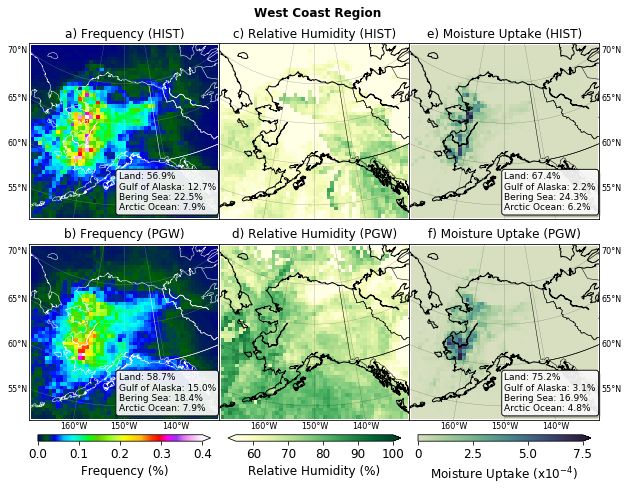

In [55]:
#%----------------------------------------------------------------------

fig = plt.figure(figsize=(8.,6.))
fig.suptitle(regions_to_str(1)+" Region", fontsize=12, x=0.5, y=1.025, fontweight='bold')

#%----------------------------------------------------------------------

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.475]) 
ax1.set_title(f'a) Frequency (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, freq_1c, cmap="gist_ncar", vmin=0, vmax=0.4)
ax1.text(0.47, 0.05, 
         u'Land: '+freq_1c_land+\
         '%\nGulf of Alaska: '+freq_1c_goa+\
         '%\nBering Sea: '+freq_1c_bs+\
         '%\nArctic Ocean: '+freq_1c_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax1.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates(color='w')
m.drawcoastlines(color='w',linewidth=0.5)
m.drawcountries(color='w',linewidth=0.5)
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='w', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[1,0,0,0], color='w', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax2 = fig.add_axes([0.0, 0.035, 0.33, 0.475]) 
ax2.set_title(f'b) Frequency (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, freq_1f, cmap="gist_ncar", vmin=0, vmax=0.4)
ax2.text(0.47, 0.05, 
         u'Land: '+freq_1f_land+\
         '%\nGulf of Alaska: '+freq_1f_goa+\
         '%\nBering Sea: '+freq_1f_bs+\
         '%\nArctic Ocean: '+freq_1f_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax2.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates(color='w')
m.drawcoastlines(color='w',linewidth=0.5)
m.drawcountries(color='w',linewidth=0.5)
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='w', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[1,0,0,0], color='w', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.015, 0.02, 0.3, 0.015])
bounds = [0, 0.1, 0.2, 0.3, 0.4]
newnorm=mpl.colors.Normalize(vmin=0, vmax=0.4)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("gist_ncar"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='max')

cbar.set_label('Frequency (%)', fontsize=12) 
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

ax3 = fig.add_axes([0.33, 0.5, 0.33, 0.475]) 
ax3.set_title(f'c) Relative Humidity (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, rh_1c, cmap=plt.cm.get_cmap("YlGn"), vmin=55, vmax=100)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax4 = fig.add_axes([0.33, 0.035, 0.33, 0.475]) 
ax4.set_title(f'd) Relative Humidity (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, rh_1f, cmap=plt.cm.get_cmap("YlGn"), vmin=55, vmax=100)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.345, 0.02, 0.3, 0.015])
bounds = [60, 70, 80, 90, 100]
newnorm=mpl.colors.Normalize(vmin=55, vmax=100)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("YlGn"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='both')

cbar.set_label('Relative Humidity (%)', fontsize=12) 
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

ax5 = fig.add_axes([0.66, 0.5, 0.33, 0.475]) 
ax5.set_title(f'e) Moisture Uptake (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, ds1muc, cmap=cmap, vmin=0, vmax=0.00075)
ax5.text(0.5, 0.05, 
         u'Land: '+ds1muc_land+\
         '%\nGulf of Alaska: '+ds1muc_goa+\
         '%\nBering Sea: '+ds1muc_bs+\
         '%\nArctic Ocean: '+ds1muc_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,1,0,0], color='k', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax6 = fig.add_axes([0.66, 0.035, 0.33, 0.475]) 
ax6.set_title(f'f) Moisture Uptake (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, ds1muf, cmap=cmap, vmin=0, vmax=0.00075)
ax6.text(0.5, 0.05, 
         u'Land: '+ds1muf_land+\
         '%\nGulf of Alaska: '+ds1muf_goa+\
         '%\nBering Sea: '+ds1muf_bs+\
         '%\nArctic Ocean: '+ds1muf_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax6.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,1,0,0], color='k', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.675, 0.02, 0.3, 0.015])
bounds = [0, 0.00025, 0.0005, 0.00075]
newnorm=mpl.colors.Normalize(vmin=0., vmax=0.00075)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='max')

cbar.set_label('Moisture Uptake (x10$^{-4}$)', fontsize=12) 
cbar.set_ticklabels([0, 2.5, 5.0, 7.5])
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_subregion1.png", bbox_inches='tight', dpi=1200)
plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_subregion1.pdf", bbox_inches='tight', dpi=1200)
plt.show()

#%----------------------------------------------------------------------

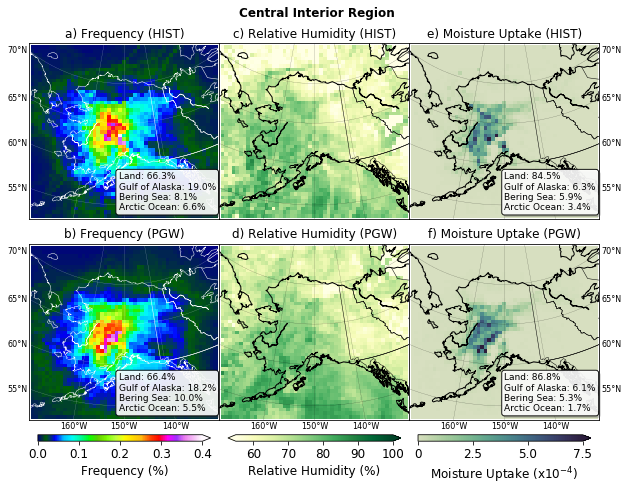

In [54]:
#%----------------------------------------------------------------------

fig = plt.figure(figsize=(8.,6.))
fig.suptitle(regions_to_str(3)+" Region", fontsize=12, x=0.5, y=1.025, fontweight='bold')

#%----------------------------------------------------------------------

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.475]) 
ax1.set_title(f'a) Frequency (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, freq_3c, cmap="gist_ncar", vmin=0, vmax=0.4)
ax1.text(0.47, 0.05, 
         u'Land: '+freq_3c_land+\
         '%\nGulf of Alaska: '+freq_3c_goa+\
         '%\nBering Sea: '+freq_3c_bs+\
         '%\nArctic Ocean: '+freq_3c_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax1.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates(color='w')
m.drawcoastlines(color='w',linewidth=0.5)
m.drawcountries(color='w',linewidth=0.5)
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='w', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[1,0,0,0], color='w', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax2 = fig.add_axes([0.0, 0.035, 0.33, 0.475]) 
ax2.set_title(f'b) Frequency (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, freq_3f, cmap="gist_ncar", vmin=0, vmax=0.4)
ax2.text(0.47, 0.05, 
         u'Land: '+freq_3f_land+\
         '%\nGulf of Alaska: '+freq_3f_goa+\
         '%\nBering Sea: '+freq_3f_bs+\
         '%\nArctic Ocean: '+freq_3f_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax2.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates(color='w')
m.drawcoastlines(color='w',linewidth=0.5)
m.drawcountries(color='w',linewidth=0.5)
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='w', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[1,0,0,0], color='w', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.015, 0.02, 0.3, 0.015])
bounds = [0, 0.1, 0.2, 0.3, 0.4]
newnorm=mpl.colors.Normalize(vmin=0, vmax=0.4)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("gist_ncar"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='max')

cbar.set_label('Frequency (%)', fontsize=12) 
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

ax3 = fig.add_axes([0.33, 0.5, 0.33, 0.475]) 
ax3.set_title(f'c) Relative Humidity (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, rh_3c, cmap=plt.cm.get_cmap("YlGn"), vmin=55, vmax=100)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax4 = fig.add_axes([0.33, 0.035, 0.33, 0.475]) 
ax4.set_title(f'd) Relative Humidity (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, rh_3f, cmap=plt.cm.get_cmap("YlGn"), vmin=55, vmax=100)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.345, 0.02, 0.3, 0.015])
bounds = [60, 70, 80, 90, 100]
newnorm=mpl.colors.Normalize(vmin=55, vmax=100)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("YlGn"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='both')

cbar.set_label('Relative Humidity (%)', fontsize=12) 
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

ax5 = fig.add_axes([0.66, 0.5, 0.33, 0.475]) 
ax5.set_title(f'e) Moisture Uptake (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, ds2muc, cmap=cmap, vmin=0, vmax=0.00075)
ax5.text(0.5, 0.05, 
         u'Land: '+ds2muc_land+\
         '%\nGulf of Alaska: '+ds2muc_goa+\
         '%\nBering Sea: '+ds2muc_bs+\
         '%\nArctic Ocean: '+ds2muc_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,1,0,0], color='k', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax6 = fig.add_axes([0.66, 0.035, 0.33, 0.475]) 
ax6.set_title(f'f) Moisture Uptake (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, ds2muf, cmap=cmap, vmin=0, vmax=0.00075)
ax6.text(0.5, 0.05, 
         u'Land: '+ds2muf_land+\
         '%\nGulf of Alaska: '+ds2muf_goa+\
         '%\nBering Sea: '+ds2muf_bs+\
         '%\nArctic Ocean: '+ds2muf_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax6.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,1,0,0], color='k', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.675, 0.02, 0.3, 0.015])
bounds = [0, 0.00025, 0.0005, 0.00075]
newnorm=mpl.colors.Normalize(vmin=0., vmax=0.00075)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='max')

cbar.set_label('Moisture Uptake (x10$^{-4}$)', fontsize=12) 
cbar.set_ticklabels([0, 2.5, 5.0, 7.5])
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_subregion3.png", bbox_inches='tight', dpi=1200)
plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_subregion3.pdf", bbox_inches='tight', dpi=1200)
plt.show()

#%----------------------------------------------------------------------

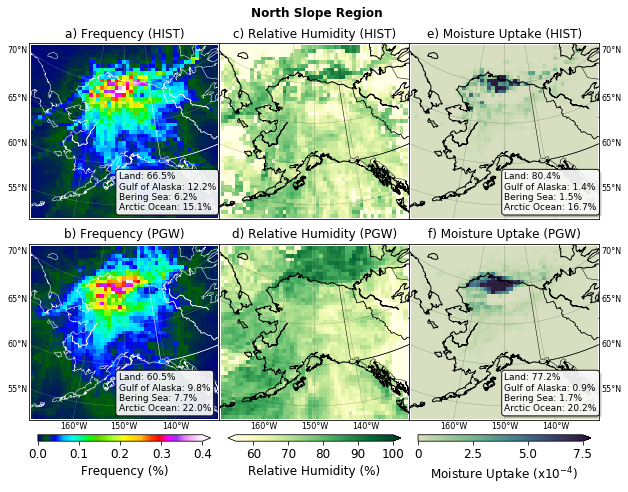

In [58]:
#%----------------------------------------------------------------------

fig = plt.figure(figsize=(8.,6.))
fig.suptitle(regions_to_str(4)+" Region", fontsize=12, x=0.5, y=1.025, fontweight='bold')

#%----------------------------------------------------------------------

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.475]) 
ax1.set_title(f'a) Frequency (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, freq_4c, cmap="gist_ncar", vmin=0, vmax=0.4)
ax1.text(0.47, 0.05, 
         u'Land: '+freq_4c_land+\
         '%\nGulf of Alaska: '+freq_4c_goa+\
         '%\nBering Sea: '+freq_4c_bs+\
         '%\nArctic Ocean: '+freq_4c_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax1.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates(color='w')
m.drawcoastlines(color='w',linewidth=0.5)
m.drawcountries(color='w',linewidth=0.5)
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='w', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[1,0,0,0], color='w', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax2 = fig.add_axes([0.0, 0.035, 0.33, 0.475]) 
ax2.set_title(f'b) Frequency (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, freq_4f, cmap="gist_ncar", vmin=0, vmax=0.4)
ax2.text(0.47, 0.05, 
         u'Land: '+freq_4f_land+\
         '%\nGulf of Alaska: '+freq_4f_goa+\
         '%\nBering Sea: '+freq_4f_bs+\
         '%\nArctic Ocean: '+freq_4f_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax2.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates(color='w')
m.drawcoastlines(color='w',linewidth=0.5)
m.drawcountries(color='w',linewidth=0.5)
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='w', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[1,0,0,0], color='w', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.015, 0.02, 0.3, 0.015])
bounds = [0, 0.1, 0.2, 0.3, 0.4]
newnorm=mpl.colors.Normalize(vmin=0, vmax=0.4)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("gist_ncar"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='max')

cbar.set_label('Frequency (%)', fontsize=12) 
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

ax3 = fig.add_axes([0.33, 0.5, 0.33, 0.475]) 
ax3.set_title(f'c) Relative Humidity (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, rh_4c, cmap=plt.cm.get_cmap("YlGn"), vmin=55, vmax=100)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax4 = fig.add_axes([0.33, 0.035, 0.33, 0.475]) 
ax4.set_title(f'd) Relative Humidity (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, rh_4f, cmap=plt.cm.get_cmap("YlGn"), vmin=55, vmax=100)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.345, 0.02, 0.3, 0.015])
bounds = [60, 70, 80, 90, 100]
newnorm=mpl.colors.Normalize(vmin=55, vmax=100)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("YlGn"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='both')

cbar.set_label('Relative Humidity (%)', fontsize=12) 
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

ax5 = fig.add_axes([0.66, 0.5, 0.33, 0.475]) 
ax5.set_title(f'e) Moisture Uptake (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, ds3muc, cmap=cmap, vmin=0, vmax=0.00075)
ax5.text(0.5, 0.05, 
         u'Land: '+ds3muc_land+\
         '%\nGulf of Alaska: '+ds3muc_goa+\
         '%\nBering Sea: '+ds3muc_bs+\
         '%\nArctic Ocean: '+ds3muc_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,1,0,0], color='k', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax6 = fig.add_axes([0.66, 0.035, 0.33, 0.475]) 
ax6.set_title(f'f) Moisture Uptake (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, ds3muf, cmap=cmap, vmin=0, vmax=0.00075)
ax6.text(0.5, 0.05, 
         u'Land: '+ds3muf_land+\
         '%\nGulf of Alaska: '+ds3muf_goa+\
         '%\nBering Sea: '+ds3muf_bs+\
         '%\nArctic Ocean: '+ds3muf_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax6.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,1,0,0], color='k', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.675, 0.02, 0.3, 0.015])
bounds = [0, 0.00025, 0.0005, 0.00075]
newnorm=mpl.colors.Normalize(vmin=0., vmax=0.00075)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='max')

cbar.set_label('Moisture Uptake (x10$^{-4}$)', fontsize=12) 
cbar.set_ticklabels([0, 2.5, 5.0, 7.5])
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_subregion4.png", bbox_inches='tight', dpi=1200)
plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_subregion4.pdf", bbox_inches='tight', dpi=1200)
plt.show()

#%----------------------------------------------------------------------

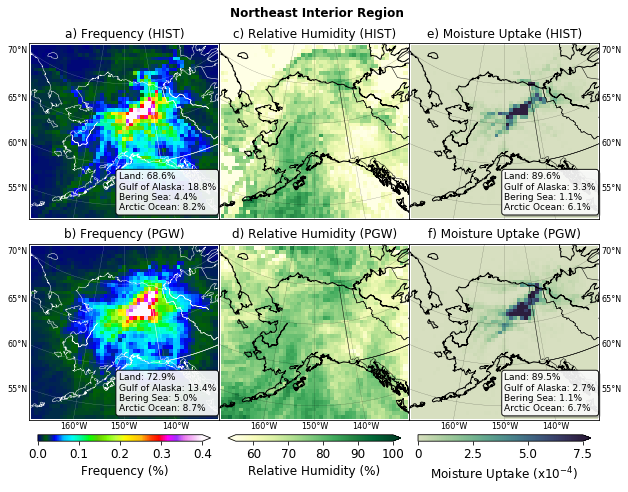

In [57]:
#%----------------------------------------------------------------------

fig = plt.figure(figsize=(8.,6.))
fig.suptitle(regions_to_str(5)+" Region", fontsize=12, x=0.5, y=1.025, fontweight='bold')

#%----------------------------------------------------------------------

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.475]) 
ax1.set_title(f'a) Frequency (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, freq_5c, cmap="gist_ncar", vmin=0, vmax=0.4)
ax1.text(0.47, 0.05, 
         u'Land: '+freq_5c_land+\
         '%\nGulf of Alaska: '+freq_5c_goa+\
         '%\nBering Sea: '+freq_5c_bs+\
         '%\nArctic Ocean: '+freq_5c_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax1.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates(color='w')
m.drawcoastlines(color='w',linewidth=0.5)
m.drawcountries(color='w',linewidth=0.5)
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='w', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[1,0,0,0], color='w', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax2 = fig.add_axes([0.0, 0.035, 0.33, 0.475]) 
ax2.set_title(f'b) Frequency (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, freq_5f, cmap="gist_ncar", vmin=0, vmax=0.4)
ax2.text(0.47, 0.05, 
         u'Land: '+freq_5f_land+\
         '%\nGulf of Alaska: '+freq_5f_goa+\
         '%\nBering Sea: '+freq_5f_bs+\
         '%\nArctic Ocean: '+freq_5f_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax2.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates(color='w')
m.drawcoastlines(color='w',linewidth=0.5)
m.drawcountries(color='w',linewidth=0.5)
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='w', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[1,0,0,0], color='w', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.015, 0.02, 0.3, 0.015])
bounds = [0, 0.1, 0.2, 0.3, 0.4]
newnorm=mpl.colors.Normalize(vmin=0, vmax=0.4)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("gist_ncar"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='max')

cbar.set_label('Frequency (%)', fontsize=12) 
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

ax3 = fig.add_axes([0.33, 0.5, 0.33, 0.475]) 
ax3.set_title(f'c) Relative Humidity (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, rh_5c, cmap=plt.cm.get_cmap("YlGn"), vmin=55, vmax=100)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax4 = fig.add_axes([0.33, 0.035, 0.33, 0.475]) 
ax4.set_title(f'd) Relative Humidity (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, rh_5f, cmap=plt.cm.get_cmap("YlGn"), vmin=55, vmax=100)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.345, 0.02, 0.3, 0.015])
bounds = [60, 70, 80, 90, 100]
newnorm=mpl.colors.Normalize(vmin=55, vmax=100)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("YlGn"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='both')

cbar.set_label('Relative Humidity (%)', fontsize=12) 
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

ax5 = fig.add_axes([0.66, 0.5, 0.33, 0.475]) 
ax5.set_title(f'e) Moisture Uptake (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, ds4muc, cmap=cmap, vmin=0, vmax=0.00075)
ax5.text(0.5, 0.05, 
         u'Land: '+ds4muc_land+\
         '%\nGulf of Alaska: '+ds4muc_goa+\
         '%\nBering Sea: '+ds4muc_bs+\
         '%\nArctic Ocean: '+ds4muc_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,1,0,0], color='k', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax6 = fig.add_axes([0.66, 0.035, 0.33, 0.475]) 
ax6.set_title(f'f) Moisture Uptake (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, ds4muf, cmap=cmap, vmin=0, vmax=0.00075)
ax6.text(0.5, 0.05, 
         u'Land: '+ds4muf_land+\
         '%\nGulf of Alaska: '+ds4muf_goa+\
         '%\nBering Sea: '+ds4muf_bs+\
         '%\nArctic Ocean: '+ds4muf_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax6.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,1,0,0], color='k', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.675, 0.02, 0.3, 0.015])
bounds = [0, 0.00025, 0.0005, 0.00075]
newnorm=mpl.colors.Normalize(vmin=0., vmax=0.00075)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='max')

cbar.set_label('Moisture Uptake (x10$^{-4}$)', fontsize=12) 
cbar.set_ticklabels([0, 2.5, 5.0, 7.5])
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_subregion5.png", bbox_inches='tight', dpi=1200)
plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_subregion5.pdf", bbox_inches='tight', dpi=1200)
plt.show()

#%----------------------------------------------------------------------

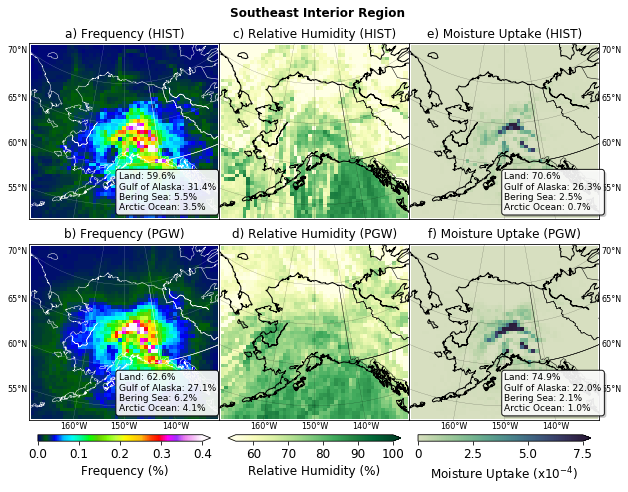

In [56]:
#%----------------------------------------------------------------------

fig = plt.figure(figsize=(8.,6.))
fig.suptitle(regions_to_str(6)+" Region", fontsize=12, x=0.5, y=1.025, fontweight='bold')

#%----------------------------------------------------------------------

ax1 = fig.add_axes([0.0, 0.5, 0.33, 0.475]) 
ax1.set_title(f'a) Frequency (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, freq_6c, cmap="gist_ncar", vmin=0, vmax=0.4)
ax1.text(0.47, 0.05, 
         u'Land: '+freq_6c_land+\
         '%\nGulf of Alaska: '+freq_6c_goa+\
         '%\nBering Sea: '+freq_6c_bs+\
         '%\nArctic Ocean: '+freq_6c_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax1.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates(color='w')
m.drawcoastlines(color='w',linewidth=0.5)
m.drawcountries(color='w',linewidth=0.5)
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='w', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[1,0,0,0], color='w', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax2 = fig.add_axes([0.0, 0.035, 0.33, 0.475]) 
ax2.set_title(f'b) Frequency (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, freq_6f, cmap="gist_ncar", vmin=0, vmax=0.4)
ax2.text(0.47, 0.05, 
         u'Land: '+freq_6f_land+\
         '%\nGulf of Alaska: '+freq_6f_goa+\
         '%\nBering Sea: '+freq_6f_bs+\
         '%\nArctic Ocean: '+freq_6f_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax2.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates(color='w')
m.drawcoastlines(color='w',linewidth=0.5)
m.drawcountries(color='w',linewidth=0.5)
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='w', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[1,0,0,0], color='w', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.015, 0.02, 0.3, 0.015])
bounds = [0, 0.1, 0.2, 0.3, 0.4]
newnorm=mpl.colors.Normalize(vmin=0, vmax=0.4)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("gist_ncar"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='max')

cbar.set_label('Frequency (%)', fontsize=12) 
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

ax3 = fig.add_axes([0.33, 0.5, 0.33, 0.475]) 
ax3.set_title(f'c) Relative Humidity (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, rh_6c, cmap=plt.cm.get_cmap("YlGn"), vmin=55, vmax=100)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax4 = fig.add_axes([0.33, 0.035, 0.33, 0.475]) 
ax4.set_title(f'd) Relative Humidity (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, rh_6f, cmap=plt.cm.get_cmap("YlGn"), vmin=55, vmax=100)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.345, 0.02, 0.3, 0.015])
bounds = [60, 70, 80, 90, 100]
newnorm=mpl.colors.Normalize(vmin=55, vmax=100)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.get_cmap("YlGn"),
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='both')

cbar.set_label('Relative Humidity (%)', fontsize=12) 
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

ax5 = fig.add_axes([0.66, 0.5, 0.33, 0.475]) 
ax5.set_title(f'e) Moisture Uptake (HIST)', fontsize=12)
pc = m.pcolormesh(x, y, ds5muc, cmap=cmap, vmin=0, vmax=0.00075)
ax5.text(0.5, 0.05, 
         u'Land: '+ds5muc_land+\
         '%\nGulf of Alaska: '+ds5muc_goa+\
         '%\nBering Sea: '+ds5muc_bs+\
         '%\nArctic Ocean: '+ds5muc_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,0], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,1,0,0], color='k', fontsize=8, linewidth=0.25)

#%----------------------------------------------------------------------

ax6 = fig.add_axes([0.66, 0.035, 0.33, 0.475]) 
ax6.set_title(f'f) Moisture Uptake (PGW)', fontsize=12)
pc = m.pcolormesh(x, y, ds5muf, cmap=cmap, vmin=0, vmax=0.00075)
ax6.text(0.5, 0.05, 
         u'Land: '+ds5muf_land+\
         '%\nGulf of Alaska: '+ds5muf_goa+\
         '%\nBering Sea: '+ds5muf_bs+\
         '%\nArctic Ocean: '+ds5muf_ao+'%', 
         fontsize=9, alpha=1., color='k', zorder=6, transform=ax6.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=0.9, linewidth=1., boxstyle='round', 
                   pad=0.3, path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawmeridians([-160,-150,-140], labels=[0,0,0,1], color='k', fontsize=8, linewidth=0.25)
m.drawparallels([55,60,65,70], labels=[0,1,0,0], color='k', fontsize=8, linewidth=0.25)

#%---------------------------------------------cbar

cbar_ax = fig.add_axes([0.675, 0.02, 0.3, 0.015])
bounds = [0, 0.00025, 0.0005, 0.00075]
newnorm=mpl.colors.Normalize(vmin=0., vmax=0.00075)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                                 norm=newnorm,
                                 ticks=bounds,
                                 orientation='horizontal',
                                 extend='max')

cbar.set_label('Moisture Uptake (x10$^{-4}$)', fontsize=12) 
cbar.set_ticklabels([0, 2.5, 5.0, 7.5])
cbar.ax.tick_params(labelsize=12)

#%----------------------------------------------------------------------

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_subregion6.png", bbox_inches='tight', dpi=1200)
plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_final_subregion6.pdf", bbox_inches='tight', dpi=1200)
plt.show()

#%----------------------------------------------------------------------